## Loading libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [111]:
import pandas as pd
import numpy as np
from external_modules.shuyu import *
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import scipy
import itertools # for combinations


In [3]:
airbnb_df =[]
for m in ['jan','feb','mar','apr','may','jun','jul','aug','sep','nov']:
    airbnb_df.append(pd.read_csv('data/listings_{}.csv'.format(m), parse_dates=['last_review']))

## Concat dateframes into one

In [107]:
airbnb_df_2019 = pd.concat(airbnb_df)

In [108]:
airbnb_df_2019

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9554,"Cozy, 3 minutes to Piccadilly Line",31655,Guy,NaN,Haringey,51.587767,-0.105666,Private room,35,1,134,2019-01-01,1.64,4,0
1,25123,Clean big Room in London (Room 1),103583,Grace,NaN,Barnet,51.572243,-0.209060,Private room,29,15,118,2018-11-01,1.11,4,0
2,28010,LOVELY Dbl Bedroom in Shoreditch!,119316,Valentina,NaN,Tower Hamlets,51.524969,-0.073727,Private room,50,3,38,2018-01-02,0.48,3,81
3,33332,Twickenham Stadium & Wimbledon easy reach Ensuite,144444,Chi-Chi,NaN,Hounslow,51.465074,-0.324207,Private room,100,1,4,2018-11-04,0.04,2,365
4,36299,Kew Gardens 3BR house in cul-de-sac,155938,Geert,NaN,Richmond upon Thames,51.479345,-0.280662,Entire home/apt,195,3,63,2018-12-30,0.63,1,279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85063,38398365,Beautiful flat in Central London,24782379,Shabnam,NaN,Lambeth,51.486010,-0.127660,Entire home/apt,117,3,2,2019-11-04,2.00,1,59
85064,39869123,Elegant stylish modern house with amazing view!,21145791,Ingrid,NaN,Merton,51.406280,-0.232440,Private room,69,2,0,NaT,NaN,2,113
85065,39869214,Holland Road - Kensington Olympia,251922260,Christian,NaN,Hammersmith and Fulham,51.502440,-0.215470,Entire home/apt,90,3,0,NaT,NaN,4,63
85066,39869249,Functional single room 18 min to London Bridge,255372486,Nudrat,NaN,Bromley,51.357420,0.107640,Private room,30,2,0,NaT,NaN,4,1


## Data cleaning and feature engineering

### check dtypes

In [6]:
airbnb_df_2019.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                      float64
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

### drop missing value columns

In [7]:
airbnb_df_2019.isnull().sum()

id                                     0
name                                 266
host_id                                0
host_name                            472
neighbourhood_group               817579
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                       203879
reviews_per_month                 203879
calculated_host_listings_count         0
availability_365                       0
dtype: int64

In [109]:
airbnb_df_2019.drop(['host_name','neighbourhood_group'], axis=1,inplace=True)

In [110]:
airbnb_df_2019.isnull().sum()

id                                     0
name                                 266
host_id                                0
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                       203879
reviews_per_month                 203879
calculated_host_listings_count         0
availability_365                       0
dtype: int64

### create a column of length of the name

We will treat missng valyes equal to zero

In [112]:
fix_missing_name(airbnb_df_2019,'name')

In [124]:
airbnb_df_2019['name_len'] = airbnb_df_2019['name'].apply(lambda x:len(str(x).split()))

In [125]:
airbnb_df_2019

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,name_len
0,9554,"Cozy, 3 minutes to Piccadilly Line",31655,Haringey,51.587767,-0.105666,Private room,35,1,134,2019-01-01,1.64,4,0,6
1,25123,Clean big Room in London (Room 1),103583,Barnet,51.572243,-0.209060,Private room,29,15,118,2018-11-01,1.11,4,0,7
2,28010,LOVELY Dbl Bedroom in Shoreditch!,119316,Tower Hamlets,51.524969,-0.073727,Private room,50,3,38,2018-01-02,0.48,3,81,5
3,33332,Twickenham Stadium & Wimbledon easy reach Ensuite,144444,Hounslow,51.465074,-0.324207,Private room,100,1,4,2018-11-04,0.04,2,365,7
4,36299,Kew Gardens 3BR house in cul-de-sac,155938,Richmond upon Thames,51.479345,-0.280662,Entire home/apt,195,3,63,2018-12-30,0.63,1,279,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85063,38398365,Beautiful flat in Central London,24782379,Lambeth,51.486010,-0.127660,Entire home/apt,117,3,2,2019-11-04,2.00,1,59,5
85064,39869123,Elegant stylish modern house with amazing view!,21145791,Merton,51.406280,-0.232440,Private room,69,2,0,NaT,NaN,2,113,7
85065,39869214,Holland Road - Kensington Olympia,251922260,Hammersmith and Fulham,51.502440,-0.215470,Entire home/apt,90,3,0,NaT,NaN,4,63,5
85066,39869249,Functional single room 18 min to London Bridge,255372486,Bromley,51.357420,0.107640,Private room,30,2,0,NaT,NaN,4,1,8


### check catgorical variables

In [126]:
cat_var=[]
for column in airbnb_df_2019.columns:
    if airbnb_df_2019[column].dtype=='object':
        cat_var.append(column)

In [127]:
cat_var

['name', 'neighbourhood', 'room_type']

### change object dtypes to catgorical codes

In [128]:
train_cats(airbnb_df_2019)

In [129]:
airbnb_df_2019.dtypes

id                                         int64
name                                    category
host_id                                    int64
neighbourhood                           category
latitude                                 float64
longitude                                float64
room_type                               category
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
name_len                                   int64
dtype: object

In [130]:
for _ in cat_var:
    airbnb_df_2019[_] = airbnb_df_2019[_].cat.codes

In [131]:
airbnb_df_2019.dtypes

id                                         int64
name                                       int32
host_id                                    int64
neighbourhood                               int8
latitude                                 float64
longitude                                float64
room_type                                   int8
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
name_len                                   int64
dtype: object

In [16]:
fix_missing(airbnb_df_2019,'reviews_per_month')

In [17]:
airbnb_df_2019['last_review'].dtypes == 'datetime64[ns]'

True

In [18]:
fix_missing_date(airbnb_df_2019, 'last_review')

In [19]:
airbnb_df_2019.isnull().sum()

id                                0
host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [20]:
airbnb_df_2019.dtypes

id                                         int64
host_id                                    int64
neighbourhood                               int8
latitude                                 float64
longitude                                float64
room_type                                   int8
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [21]:
airbnb_df_2019

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9554,31655,13,51.587767,-0.105666,2,35,1,134,2019-01-01,1.64,4,0
1,25123,103583,1,51.572243,-0.209060,2,29,15,118,2018-11-01,1.11,4,0
2,28010,119316,29,51.524969,-0.073727,2,50,3,38,2018-01-02,0.48,3,81
3,33332,144444,17,51.465074,-0.324207,2,100,1,4,2018-11-04,0.04,2,365
4,36299,155938,26,51.479345,-0.280662,0,195,3,63,2018-12-30,0.63,1,279
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85063,38398365,24782379,21,51.486010,-0.127660,0,117,3,2,2019-11-04,2.00,1,59
85064,39869123,21145791,23,51.406280,-0.232440,2,69,2,0,2019-12-31,0.72,2,113
85065,39869214,251922260,12,51.502440,-0.215470,0,90,3,0,2019-12-31,0.72,4,63
85066,39869249,255372486,4,51.357420,0.107640,2,30,2,0,2019-12-31,0.72,4,1


### Question: is there a statistical significance between number of reviews and price?

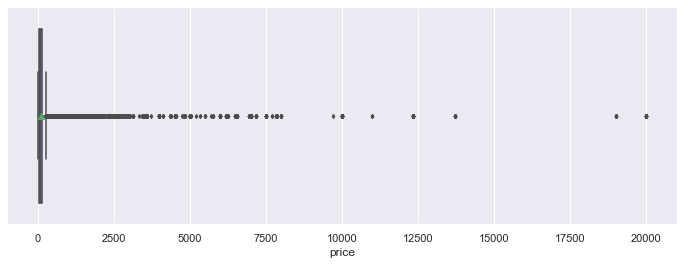

In [153]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'price', 
            data = airbnb_df_2019, 
            orient = 'h', 
            width = 0.8, 
            fliersize = 3, 
            showmeans=True, 
            ax = ax)
plt.show()

In [154]:
quantiles = np.linspace(0.9,1,11)
for i in quantiles:
    print ('{} quantile: {}'.format(round(i,2), airbnb_df_2019.price.quantile(i)))

0.9 quantile: 220.0
0.91 quantile: 230.0
0.92 quantile: 250.0
0.93 quantile: 257.0
0.94 quantile: 286.0
0.95 quantile: 300.0
0.96 quantile: 350.0
0.97 quantile: 400.0
0.98 quantile: 498.0
0.99 quantile: 690.0
1.0 quantile: 20000.0


In [23]:
outliers = airbnb_df_2019[(airbnb_df_2019['price'] >= 300)].index
airbnb_df_2019.drop(outliers, inplace=True)

### Plot relationship between reviews and price

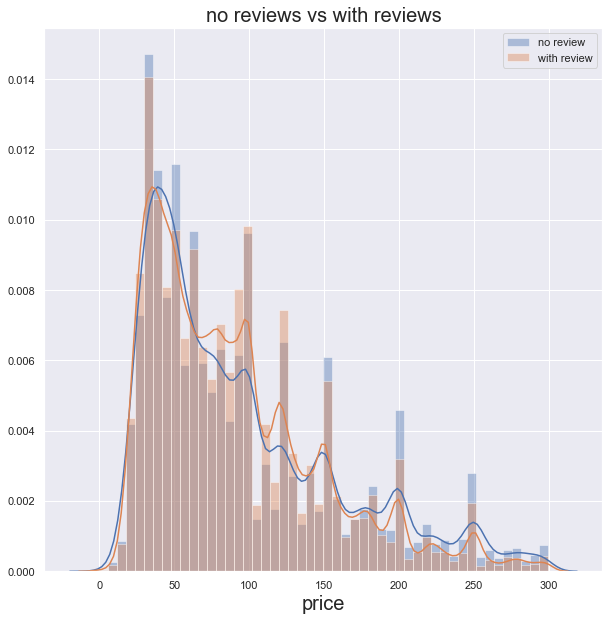

In [24]:
ctrl_q1 = airbnb_df_2019[airbnb_df_2019['number_of_reviews']==0]['price']
exper_q1 = airbnb_df_2019[airbnb_df_2019['number_of_reviews']!=0]['price']

plt.figure(figsize=(10, 10))
sns.distplot(ctrl_q1, label='no review')
sns.set_color_codes("muted")
sns.distplot(exper_q1, label='with review' )
plt.title('no reviews vs with reviews',fontsize=20)
plt.xlabel('price',fontsize=20)
plt.legend();

### Creat two sample T test

#### Create sampling data

In [157]:
scipy.stats.normaltest(ctrl_q1)

NormaltestResult(statistic=15323.958122834152, pvalue=0.0)

In [26]:
scipy.stats.normaltest(exper_q1)

NormaltestResult(statistic=59369.48996458057, pvalue=0.0)

Both P value equal to zero means the data is not normally distributed

In [27]:
ctrl_sample_q1 = create_sample_distribution(ctrl_q1)

In [28]:
exper_sample_q1 = create_sample_distribution(exper_q1)

#### Plot sampling data

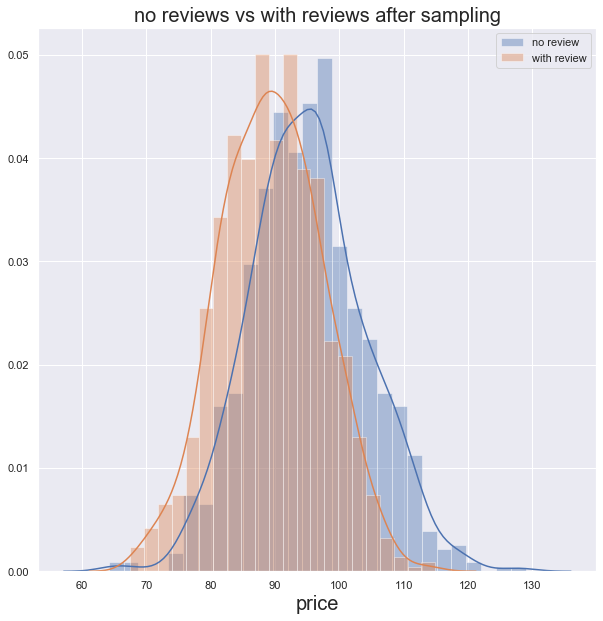

In [29]:
plt.figure(figsize=(10, 10))
sns.distplot(ctrl_sample_q1, label='no review')
sns.set_color_codes("muted")
sns.distplot(exper_sample_q1, label='with review' )
plt.title('no reviews vs with reviews after sampling',fontsize=20)
plt.xlabel('price',fontsize=20)
plt.legend();

#### Cohen'd and p value

In [163]:
p = scipy.stats.ttest_ind(ctrl_sample_q1, exper_sample_q1)[1]
d = Cohen_d(np.array(ctrl_sample_q1), np.array(exper_sample_q1))

In [31]:
result_cohen_d_p(p, d)

p value is 4.031780019204154e-49 effect size is 0.6775529930344316
It has a medium effect
Reject Null Hypothesis


### Multiple comparison ANOVA

#### check range of 'number of reviews'

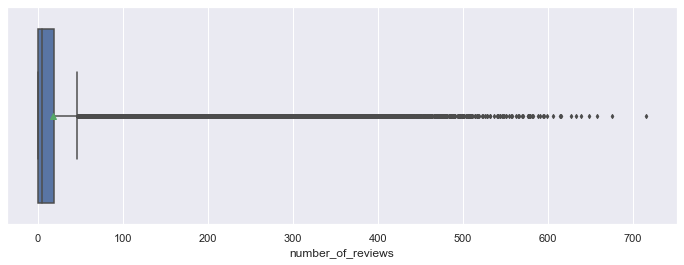

In [32]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'number_of_reviews', 
            data = airbnb_df_2019, 
            orient = 'h', 
            width = 0.8, 
            fliersize = 3, 
            showmeans=True, 
            ax = ax)
plt.show()

#### Create bins with range of 100 reviews

we are going to gather the number of reviews with bin of 100 from 0 - 600, and above 600 will be a group

In [100]:
df_binned = []
df_binned.append(airbnb_df_2019[airbnb_df_2019['number_of_reviews']==0])
for number in [0, 100,200,300,400,500,600]:
    df_binned.append(airbnb_df_2019[(airbnb_df_2019['number_of_reviews']<= (number+100))&
                      (airbnb_df_2019['number_of_reviews']>number)])

In [102]:
for n,df in enumerate(df_binned):
    print(n,scipy.stats.normaltest(df['price']))

0 NormaltestResult(statistic=15323.958122834152, pvalue=0.0)
1 NormaltestResult(statistic=53777.4135825594, pvalue=0.0)
2 NormaltestResult(statistic=4950.352973444078, pvalue=0.0)
3 NormaltestResult(statistic=933.2813252235303, pvalue=2.1904593397782015e-203)
4 NormaltestResult(statistic=160.95634288731716, pvalue=1.1188560854930316e-35)
5 NormaltestResult(statistic=61.25804468134577, pvalue=4.988668104668477e-14)
6 NormaltestResult(statistic=3.291900273715706, pvalue=0.19282926153825192)
7 NormaltestResult(statistic=1.7236107320707614, pvalue=0.4223988090679863)


In [47]:
df_sample=[]
for df in df_binned:
    df_new = create_sample_distribution(df['price'])
    df_sample.append(df_new)

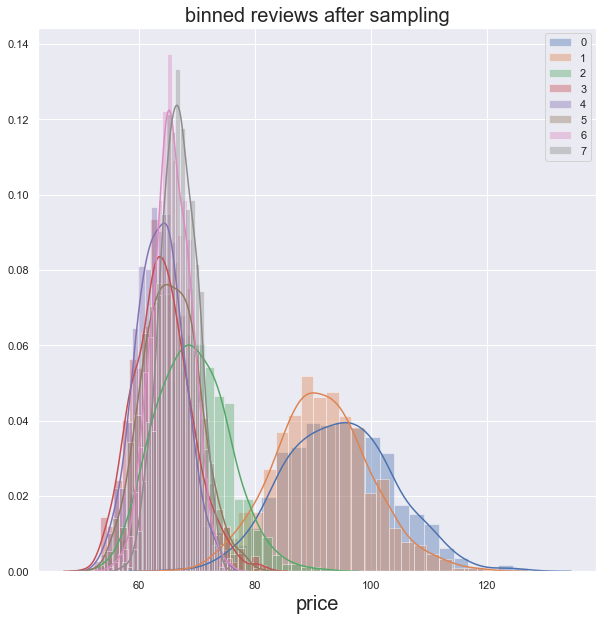

In [50]:
plt.figure(figsize=(10, 10))
for n,df in enumerate(df_sample):
    sns.distplot(df, label=n)
plt.title('binned reviews after sampling',fontsize=20)
plt.xlabel('price',fontsize=20)
plt.legend();

In [71]:
result_df=pd.DataFrame(columns=['p',"cohen'd",'hypothesis state'])
combos = itertools.combinations(df_sample, 2)
for n, combo in enumerate(list(combos)):
    num_review1 = combo[0]
    num_review2 = combo[1]
    p = stats.ttest_ind(num_review1, num_review2, equal_var=False)[1]
    d = Cohen_d(np.array(num_review1), np.array(num_review2))
    empty_df.loc[n] = [p]+[d]+['Reject Null Hypothesis' if p < 0.025 else 'Failed to reject Null Hypothesis']

In [72]:
result_df

,p,cohen'd,hypothesis state
0,3.035697e-14,0.342455,Reject Null Hypothesis
1,0.000000e+00,3.187921,Reject Null Hypothesis
2,0.000000e+00,4.066976,Reject Null Hypothesis
3,0.000000e+00,4.292540,Reject Null Hypothesis
4,0.000000e+00,3.917006,Reject Null Hypothesis
5,0.000000e+00,4.118110,Reject Null Hypothesis
6,0.000000e+00,3.997537,Reject Null Hypothesis
7,0.000000e+00,3.030877,Reject Null Hypothesis
8,0.000000e+00,3.997544,Reject Null Hypothesis
9,0.000000e+00,4.259312,Reject Null Hypothesis


### Question: is there a statistical significance between length of titles and number of reviews? if so at which levels

In [140]:
airbnb_df_2019['name_len'].unique()

array([ 6,  7,  5,  9,  4,  3,  8, 10,  2,  1, 11, 12, 42, 20, 15, 14, 13,
       27, 17, 19, 18, 21, 26, 29, 45, 16, 31, 30, 38, 23, 48])

In [143]:
np.median(airbnb_df_2019['name_len'].unique())

16.0

We will create two groups: one has length below 16 letters, the other has length equal or above 16 letters

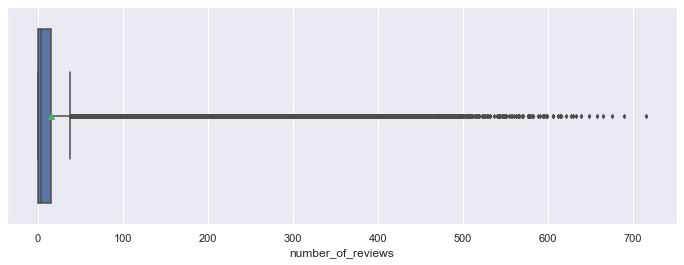

In [151]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'number_of_reviews', 
            data = airbnb_df_2019, 
            orient = 'h', 
            width = 0.8, 
            fliersize = 3, 
            showmeans=True, 
            ax = ax)
plt.show()

In [152]:
quantiles = np.linspace(0.9,1,11)
for i in quantiles:
    print ('{} quantile: {}'.format(round(i,2), airbnb_df_2019['number_of_reviews'].quantile(i)))

0.9 quantile: 43.0
0.91 quantile: 47.0
0.92 quantile: 52.0
0.93 quantile: 58.0
0.94 quantile: 65.0
0.95 quantile: 74.0
0.96 quantile: 86.0
0.97 quantile: 102.0
0.98 quantile: 127.0
0.99 quantile: 172.0
1.0 quantile: 716.0


In [155]:
outliers = airbnb_df_2019[(airbnb_df_2019['number_of_reviews'] >74)].index
airbnb_df_2019.drop(outliers, inplace=True)

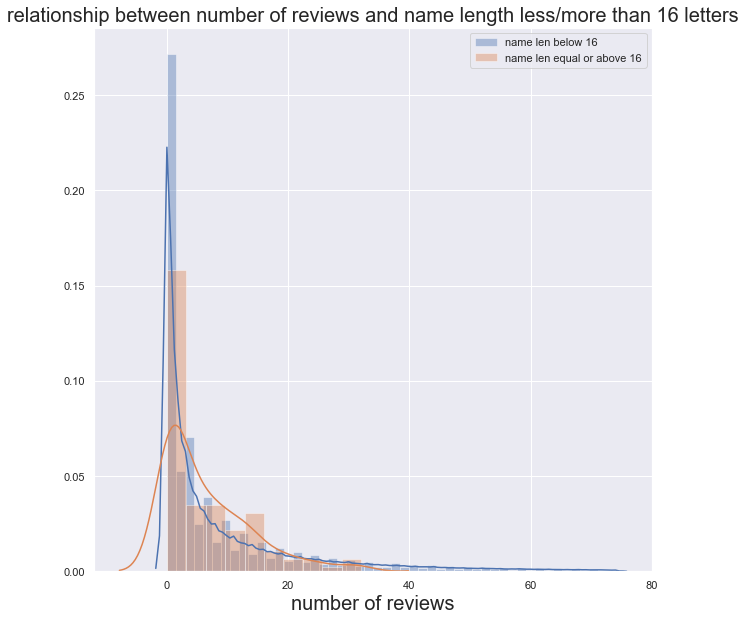

In [156]:
ctrl_q2 = airbnb_df_2019[airbnb_df_2019['name_len']<16]['number_of_reviews']
exper_q2 = airbnb_df_2019[airbnb_df_2019['name_len']>=16]['number_of_reviews']

plt.figure(figsize=(10, 10))
sns.distplot(ctrl_q2, label='name len below 16')
sns.set_color_codes("muted")
sns.distplot(exper_q2, label='name len equal or above 16' )
plt.title('relationship between number of reviews and name length less/more than 16 letters',fontsize=20)
plt.xlabel('number of reviews',fontsize=20)
plt.legend();

### Creat two sample T test

#### Create sampling data

In [158]:
scipy.stats.normaltest(ctrl_q2)

NormaltestResult(statistic=255737.37692630992, pvalue=0.0)

In [159]:
scipy.stats.normaltest(exper_q2)

NormaltestResult(statistic=39.45802778426565, pvalue=2.7027018147831617e-09)

In [160]:
ctrl_sample_q2 = create_sample_distribution(ctrl_q2)

In [161]:
exper_sample_q2 = create_sample_distribution(exper_q2)

#### Plot sampling data

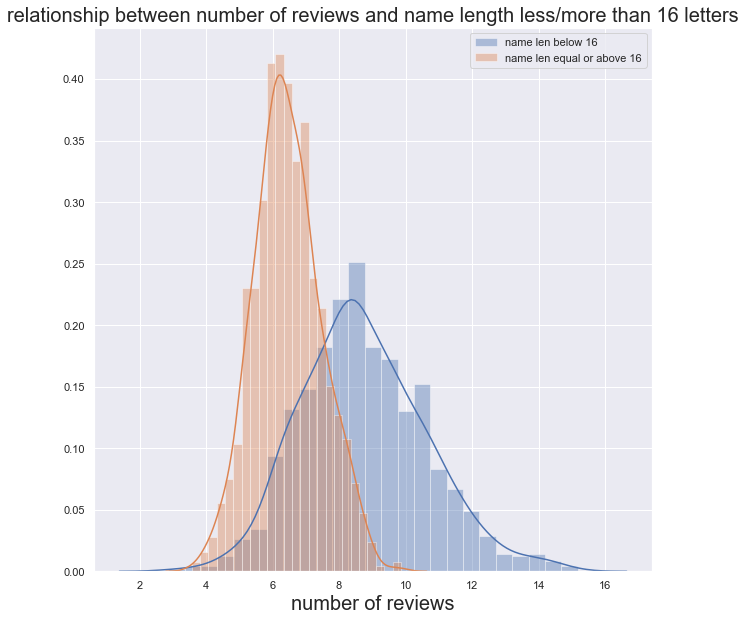

In [164]:
plt.figure(figsize=(10, 10))
sns.distplot(ctrl_sample_q2, label='name len below 16')
sns.set_color_codes("muted")
sns.distplot(exper_sample_q2, label='name len equal or above 16' )
plt.title('relationship between number of reviews and name length less/more than 16 letters',fontsize=20)
plt.xlabel('number of reviews',fontsize=20)
plt.legend();

#### Cohen'd and p value

In [165]:
p = scipy.stats.ttest_ind(ctrl_sample_q2, exper_sample_q2)[1]
d = Cohen_d(np.array(ctrl_sample_q2), np.array(exper_sample_q2))

In [166]:
result_cohen_d_p(p, d)

p value is 9.678881166396255e-198 effect size is 1.508921103735379
It has a large effect
Reject Null Hypothesis


### Summary

The length of name has significance with number of reviews (length with less/more than 16 characters). From the chart above, name with length of less than 16 characters has higher mean value of review numbers